In [ ]:
using Plots
import Plots: plot!, vline!



mutable struct WienerProcess{T<:Number}
    mu::T
    sigma2::T
    timestep::T
    values::Vector{T}
    steps::Int
    times::Array{T, 1}

    # Constructeur pour initialiser le processus sans valeurs simulées
    function WienerProcess{T}(mu::T, sigma2::T, timestep::T, steps::Int) where T<:Number
        new{T}(mu, sigma2, timestep, Vector{T}(), steps, collect(0:timestep:steps * timestep))
    end
end


function simulate!(process::WienerProcess)
    # Calculer les valeurs accumulées pour simuler le processus de Wiener
    process.values = (randn(process.steps + 1) .* sqrt.(process.sigma2 .* process.times)) .+ process.mu .* process.times
end


# Méthode pour tracer le processus de Wiener
function plot!(process::WienerProcess)
    # Tracer le processus de Wiener
    plot!(process.times, process.values, xlabel="Time", ylabel="Wiener Process", label="Wiener Process", legend=:topright)
    
    # Tracer la droite mu*t
    plot!(process.times, process.mu .* process.times, label="mu*t", linestyle=:dash)
end


# Définir les paramètres du processus de Wiener
mu = 3.0
sigma2 = 5.0
timestep = 1.
steps = 100

# Créer une instance de WienerProcess
process = WienerProcess{Float64}(mu, sigma2, timestep, steps)

# Simuler le processus de Wiener
simulate!(process)

# Tracer le processus de Wiener simulé
plot!(process)
# Imprimer les attributs du modèle



In [ ]:

# Définir la structure mutable pour le modèle ARD1 basé sur le processus de Wiener
mutable struct WienerARD1
    underlying_process::WienerProcess
    rho::Float64
    maintenance_times::Vector{<:Number}
    values::Vector{<:Number}
    
    # Constructeur pour WienerARD1
    function WienerARD1(mu::Float64, sigma2::Float64, timestep::Float64, steps::Int, rho::Float64, maintenance_times::Vector{<:Number})
        underlying_process = WienerProcess{Float64}(mu, sigma2, timestep, steps)
        simulate!(underlying_process)
        new(underlying_process, rho, maintenance_times)
    end
end


In [ ]:
mu = 3.0
sigma2 = 5.0
timestep = 1.
steps = 100
rho = 0.5
maintenance_times = [30, 60, 90]

# Créer une instance de WienerProcess
processARD1 = WienerARD1(mu, sigma2, timestep, steps, rho, maintenance_times)



In [23]:
function simulate!(process::WienerARD1)
    
    # Créer un vecteur Y initialisé avec les valeurs de X
    Y = copy(process.underlying_process.values)
    
    # Modifier les valeurs de Y selon les règles spécifiées
    for i in 1:length(process.maintenance_times) - 1
        maintenance_time = process.maintenance_times[i]
        next_maintenance_time = process.maintenance_times[i+1]
        
        # Indices des temps entre deux instants de maintenance
        indices = findall(t -> t >= maintenance_time && t < next_maintenance_time, process.underlying_process.times)
        
        # Mettre à jour les valeurs de Y
        Y[indices] .-= process.rho .* process.underlying_process.values[maintenance_time]
    end
    
    indices = findall(t -> t >= process.maintenance_times[length(process.maintenance_times)], process.underlying_process.times)
    Y[indices] .-= process.rho .* process.underlying_process.values[process.maintenance_times[length(process.maintenance_times)]]
    # Mettre à jour les valeurs de Y dans la structure process
    process.values = Y
end


simulate! (generic function with 2 methods)

In [24]:
simulate!(processARD1)

101-element Vector{Float64}:
   0.0
   0.3199596865357339
   8.871815449598573
  -2.5977027959406005
  18.380175956974423
   7.981886037061305
  16.73261072948575
  23.655353107880966
  23.410959126507894
  29.16504431024124
   ⋮
 139.491868807832
 131.1093765639059
 136.00650792936344
 205.6696863771172
 150.44648286935305
 165.34572624735645
 172.22775237037732
 116.12044033233542
 170.97028066255527

In [25]:
using Plots
import Plots: plot!, vline!
# Méthode pour tracer le processus de Wiener avec les temps de maintenance
function plot!(process::WienerARD1)
    # Tracer le processus de Wiener
    plot(process.underlying_process.times, process.values, xlabel="Time", ylabel="WienerARD1 Process", label="WienerARD1 Process", legend=:topright)
    
    # Tracer la droite mu*t
    plot!(process.underlying_process.times, process.underlying_process.mu .* process.underlying_process.times, label="mu*t", linestyle=:dash)

    vline!(process.maintenance_times, label="Maintenance Time", color=:red)
end



plot! (generic function with 6 methods)

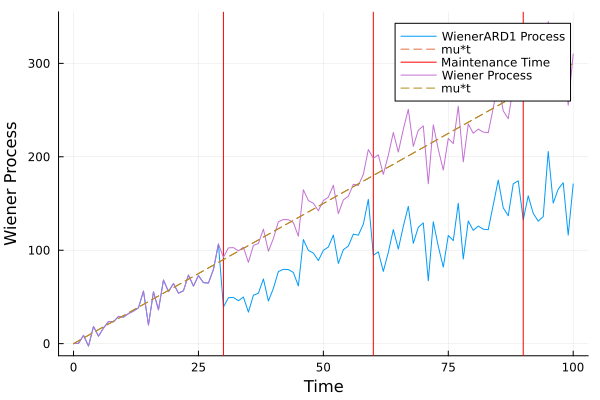

In [26]:
# Simuler le processus de Wiener avec les temps de maintenance
plot!(processARD1)
plot!(processARD1.underlying_process)
